In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import os

In [9]:
def circle_fit(A, verbose=False):
    
    '''
    This function returns a linear least squares estimate of a circle fit
    Points used must be stored in the columns of A as (x,y) coordinates
    ----
    Returns
        x- Coordinates of estimated circle
        r- Radius of estimated circle
        residual- Residual error of the fit
    '''
    [n,m] = A.shape
    A_augmented = np.hstack((A.T, np.ones((m,1))))
    A_augmented.shape

    # Linear least squares fit estimate
    y, _,_,_ = np.linalg.lstsq(A_augmented, np.sum(np.multiply(A_augmented, A_augmented), axis=1).T, rcond=None)
    x = 0.5*y[:n]
    r = np.sqrt(y[n] + np.dot(x.T,x))

    # Euclidean distance error
#     residual = abs(np.expand_dims(np.multiply(x, x), axis=1) - np.multiply(A, A)) - np.square(r)
    # Residual
    residual = abs(np.sum((np.sum(np.square(np.expand_dims(x, axis=1) - A), axis=0) - r**2)))
    
    return x, r, residual

In [10]:
# Gruntz data
A = np.asarray([(0.7,4.0), (3.3,4.7), (5.6,4.0), (7.5,1.3), (6.4,-1.1), (4.4,-3.0), (0.3,-2.5), (-1.1,1.3)]).T
A.shape

(2, 8)

In [11]:
x, r, residual = circle_fit(A)
print(residual)

8.000000000000021


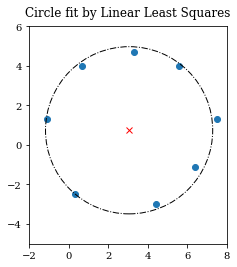

In [12]:
# Plot synthetic data and estimated circle

matplotlib.rc('font', family='serif')

fig, axes = plt.subplots()
plt.scatter(A[0,:],A[1,:])
plt.plot(x[0],x[1],'rx')

circle = plt.Circle(x, radius=r, fill=False, linestyle='-.')

axes.set_aspect(1)
axes.add_artist(circle)

axes.set_ylim([-5,6])
axes.set_xlim([-2,8])

plt.title('Circle fit by Linear Least Squares', pad=10.0)
plt.show()